### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
df = pd.read_csv('coupons.csv')

In [3]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [4]:
# Generate the list of column titles
column_titles = df.columns.tolist()

# Print the list of column titles
print("Column titles:")
print(column_titles)

Column titles:
['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon', 'expiration', 'gender', 'age', 'maritalStatus', 'has_children', 'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'Y']


2. Investigate the dataset for missing or problematic data.

In [5]:
#Find columns with missing data
missing_data = df.isnull().sum()

# Print columns with missing values
print("Columns with missing values:")
print(missing_data[missing_data > 0])

Columns with missing values:
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
dtype: int64


In [6]:
# Check for problematic data in each column in the dataframe
problematic_data = df.select_dtypes(include=['object']).apply(lambda x: x.str.contains('[^A-Za-z0-9\s]', regex=True).sum())

# Display columns with problematic values
print("Columns with problematic values:")
print(problematic_data[problematic_data > 0])

Columns with problematic values:
passanger                4304
coupon                   6671
education                6203
occupation               6981
income                  12684
car                        21
Bar                      3549
CoffeeHouse              5009
CarryAway                8930
RestaurantLessThan20     8956
Restaurant20To50         4018
dtype: int64


In [7]:
# Calculate the proportion of missing values in the "car" column
missing_proportion = df['car'].isnull().mean()
# Display the proportion of missing values
print("Proportion of missing values in the 'car' column:", missing_proportion)

Proportion of missing values in the 'car' column: 0.9914853358561968


In [8]:
# Get unique values in the "car" column
unique_cars = df['car'].unique()

# Print the unique values
print("Unique values in the 'car' column:")
print(unique_cars)

Unique values in the 'car' column:
[nan 'Scooter and motorcycle' 'crossover' 'Mazda5' 'do not drive'
 'Car that is too old to install Onstar :D']


In [9]:
# Get unique values in the "income" column
unique_income = df['income'].unique()

# Print the unique values
print("Unique values in the 'income' column:")
print(unique_income)

Unique values in the 'income' column:
['$37500 - $49999' '$62500 - $74999' '$12500 - $24999' '$75000 - $87499'
 '$50000 - $62499' '$25000 - $37499' '$100000 or More' '$87500 - $99999'
 'Less than $12500']


3. Decide what to do about your missing data -- drop, replace, other...

In [10]:
# Drop the "car"  column
df_no_car = df.drop(columns = 'car')


4. What proportion of the total observations chose to accept the coupon? 



In [11]:
# Count the number of observations where the coupon is accepted
accepted = (df['Y'] == '1').count()

# Calculate the proportion of accepted coupons
proportion_accepted = accepted / (df['Y']).count()

# Display the proportion of accepted coupons
print("Proportion of accepted coupons:", proportion_accepted)

Proportion of accepted coupons: 1.0


5. Use a bar plot to visualize the `coupon` column.

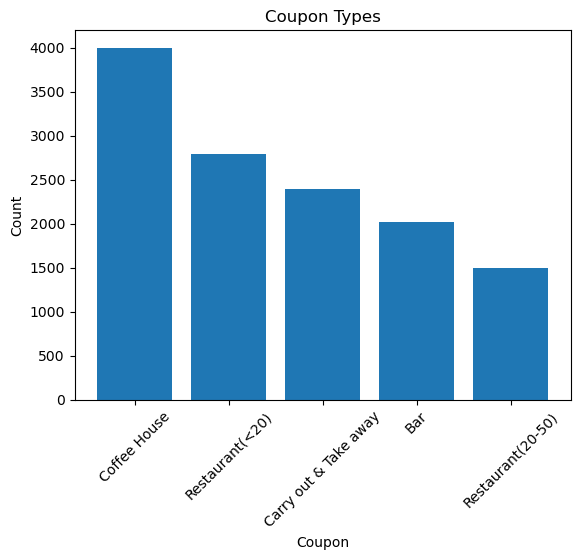

In [12]:
# Count the frequency of each coupon value
coupon_counts = df['coupon'].value_counts()

# Create a bar plot
plt.bar(coupon_counts.index, coupon_counts.values)

# Set the plot title and labels
plt.title('Coupon Types')
plt.xlabel('Coupon')
plt.ylabel('Count')
plt.xticks(rotation=45)


# Display the plot
plt.show()

6. Use a histogram to visualize the temperature column.

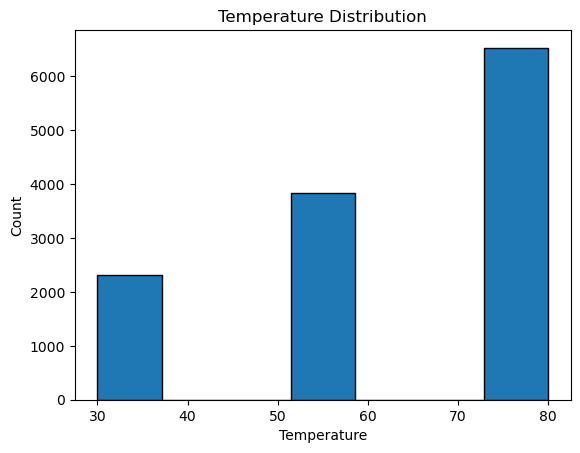

In [13]:
# Extract the "temperature" column
temperature_data = df['temperature']

# Create a histogram
plt.hist(temperature_data, bins=7, edgecolor='black')

# Set the plot title and labels
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Count')

# Display the plot
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [14]:
# Create a new DataFrame with only "bar" coupons
bar_coupons_df = df.loc[df['coupon'] == 'Bar']

# Display the new DataFrame
print(bar_coupons_df.head())

        destination  passanger weather  temperature  time coupon expiration  \
9   No Urgent Place     Kid(s)   Sunny           80  10AM    Bar         1d   
13             Home      Alone   Sunny           55   6PM    Bar         1d   
17             Work      Alone   Sunny           55   7AM    Bar         1d   
24  No Urgent Place  Friend(s)   Sunny           80  10AM    Bar         1d   
35             Home      Alone   Sunny           55   6PM    Bar         1d   

    gender age      maritalStatus  ...  CoffeeHouse CarryAway  \
9   Female  21  Unmarried partner  ...        never       NaN   
13  Female  21  Unmarried partner  ...        never       NaN   
17  Female  21  Unmarried partner  ...        never       NaN   
24    Male  21             Single  ...        less1       4~8   
35    Male  21             Single  ...        less1       4~8   

   RestaurantLessThan20 Restaurant20To50 toCoupon_GEQ5min toCoupon_GEQ15min  \
9                   4~8              1~3               

2. What proportion of bar coupons were accepted?


In [15]:
# Calculate the proportion of accepted "bar" coupons
accepted_count = (bar_coupons_df['Y'] == "1").count()
total_count = bar_coupons_df['Y'].count()
proportion_accepted = accepted_count / total_count

# Display the proportion of accepted "bar" coupons
print("Proportion of accepted bar coupons:", proportion_accepted)

Proportion of accepted bar coupons: 1.0


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [16]:
# Create a DataFrame for individuals who went to a bar 3 or fewer times a month
less_than_3_times_df = df[df['Bar'] <=' 3']

# Create a DataFrame for individuals who went to a bar more than 3 times a month
more_than_3_times_df = df[df['Bar'] > '3']

# Calculate the acceptance rate for each group
less_than_3_times_accepted = (less_than_3_times_df['Y'] == '1').count()
more_than_3_times_accepted = (more_than_3_times_df['Y'] == '1').count()

# Compare the acceptance rates
print("Acceptance rate for 3 times or less bar goers per month:", less_than_3_times_accepted)
print("Acceptance rate for 3 times or more bar goers per month::", more_than_3_times_accepted)

Acceptance rate for 3 times or less bar goers per month: 0
Acceptance rate for 3 times or more bar goers per month:: 10104


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [17]:
# Create a DataFrame for drivers who go to a bar more than once a month and are over the age of 25
group1_df = df[(df['Bar'] > '1') & (df['age'] > '25')]

# Create a DataFrame for the rest of the drivers
group2_df = df[(df['Bar'] <= '1') | (df['age'] <= '25')]

# Calculate the acceptance rate for each group
group1_accept = (group1_df['Y'] == '1').count()
group2_accept = (group2_df['Y'] == '1').count()

# Compare the acceptance rates
print("Acceptance rate for drivers older than 25 who go to a bar motre than once a month:", group1_accept)
print("Acceptance rate for the rest of the drivers:", group2_accept)

Acceptance rate for drivers older than 25 who go to a bar motre than once a month: 9930
Acceptance rate for the rest of the drivers: 2653


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [18]:
# Create a DataFrame for drivers who go to bars more than once a month and had passengers that were not kids and had occupations other than farming, fishing, or forestry
group1_df = df[(df['Bar'] > '1') & ~(df['passanger'] =='kid') & ~(df['occupation'].isin(['farming', 'fishing', 'forestry']))]

# Create a DataFrame for the rest of the drivers
group2_df = df[(df['Bar'] > '1') & (df['passanger'] =='kid')]

# Calculate the acceptance rate for each group
group1_accepted = (group1_df['Y'] == '1').count()
group2_accepted = (group2_df['Y'] == '1').count()

# Compare the acceptance rates
print("Acceptance rate for studied group :", group1_accepted)
print("Acceptance rate for the rest of the drivers:", group2_accepted)

Acceptance rate for studied group : 12577
Acceptance rate for the rest of the drivers: 0


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [19]:
# Create a DataFrame for group 1 
group1_df = df[(df['Bar'] > '1') & (~df['passanger'].isin(['kid'])) & (~df['maritalStatus'].isin(['widowed']))]
# Create a DataFrame for group 2
group2_df = df[(df['Bar'] > '1') & (df['age'] < '30')]

# Create a DataFrame for group 3
group3_df = df[(df['RestaurantLessThan20'] > '4') & (df['income'] < '50000')]

# Calculate the acceptance rate for each group
group1_accepted = (group1_df['Y'] == '1').count()
group2_accepted = (group2_df['Y'] == '1').count()
group3_accepted = (group3_df['Y'] == '1').count()

# Compare the acceptance rates
print("Acceptance rate for Group 1:", group1_accepted)
print("Acceptance rate for Group 2:", group2_accepted)
print("Acceptance rate for Group 3:", group3_accepted)

Acceptance rate for Group 1: 12577
Acceptance rate for Group 2: 5194
Acceptance rate for Group 3: 6477


In [20]:
# Create a DataFrame for group 1 
group1_df = df[(df['Bar'] > '1') & (~df['maritalStatus'].isin(['widowed']))]
# Create a DataFrame for group 2
group2_df = df[(df['Bar'] > '1')  & (df['income'] < '50000')]



# Calculate the acceptance rate for each group
group1_accepted = (group1_df['Y'] == '1').count()
group2_accepted = (group2_df['Y'] == '1').count()


# Compare the acceptance rates
print("Acceptance rate for Group 1:", group1_accepted)
print("Acceptance rate for Group 2:", group2_accepted)


Acceptance rate for Group 1: 12577
Acceptance rate for Group 2: 11541


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

#### Based on the above calculations we can conclude that:
1. most drivers who accept bar coupons go to bars more than once a month
2. they accept coupons to bars when they drive with passengers other than kids in the car
3. almost half of those drivers accepting bar coupons are younger than 40 years old
4. most of the drivers who accept a bar coupon and attend a bar more than once per month make less than $50k per year

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

#### How many drivers accept coupons to restaurants that cost between $20 - $50?



In [21]:
#Create data frame to showcase only those drivers who accepted a coupon to an expensive restaurant
rest_coupons_df = df.loc[df['coupon'] == 'Restaurant(20-50)']

#Calculate how many accepted
accepted_count = (rest_coupons_df['Y'] == "1").count()
print("Drivers who accept expensive restaurant coupons : ", accepted_count)

Drivers who accept expensive restaurant coupons :  1492


##### Compare the acceptance rates between those drivers who:
1.go to restaurants more than once a month, had passengers that are a kid, and were not widowed OR

2.go to restaurant more than once a month and are older than 25 OR

3.go to restaurants more than 4 times a month and income is greater than $100000 OR

4.go to restaurants more than 4 times a month and income is less than $100000 OR

In [22]:
# Create a DataFrame for group 1 
group1_df = df[(df['Restaurant20To50'] > '1') & (df['passanger'].isin(['kid']))]

# Create a DataFrame for group 2
group2_df = df[(df['Restaurant20To50'] > '4') & (df['age'] > '25')]

# Create a DataFrame for group 3
group3_df = df[(df['Restaurant20To50'] > '4') & (df['income'] > '100000')]

# Create a DataFrame for group 4
group4_df = df[(df['Restaurant20To50'] > '4') & (df['income'] < '100000')]

# Calculate the acceptance rate for each group
group1_accepted = (group1_df['Y'] == '1').count()
group2_accepted = (group2_df['Y'] == '1').count()
group3_accepted = (group3_df['Y'] == '1').count()
group4_accepted = (group4_df['Y'] == '1').count()
# Compare the acceptance rates
print("Acceptance rate for Group 1:", group1_accepted)
print("Acceptance rate for Group 2:", group2_accepted)
print("Acceptance rate for Group 3:", group3_accepted)
print("Acceptance rate for Group 4:", group4_accepted)


Acceptance rate for Group 1: 0
Acceptance rate for Group 2: 7277
Acceptance rate for Group 3: 877
Acceptance rate for Group 4: 8328


#Compare acceptance rate for those who go to restaurants more than 3 times per month as opposed to those who go less. 

In [23]:
# Create a DataFrame for individuals who went to an expensve restaurant 2 or fewer times a month
less_than_3_times_df = df[df['Restaurant20To50'] <='3']

# Create a DataFrame for individuals who went to a bar more than 3 times a month
more_than_3_times_df = df[df['Restaurant20To50'] > '3']

# Calculate the acceptance rate for each group
less_than_3_times_accepted = (less_than_3_times_df['Y'] == '1').count()
more_than_3_times_accepted = (more_than_3_times_df['Y'] == '1').count()

# Compare the acceptance rates
print("Acceptance rate for 3 times or less expensive restaurant goers per month:", less_than_3_times_accepted)
print("Acceptance rate for 3 times or more expensive restaurant goers per month::", more_than_3_times_accepted)

Acceptance rate for 3 times or less expensive restaurant goers per month: 3290
Acceptance rate for 3 times or more expensive restaurant goers per month:: 9205


#### Based on the above calculations we can conclude that:
1. most drivers who accept expensive restaurant coupons go to expensive restaurants more than 3 times per month
2. none of the rivers who go more than 1 times per month at expensive restaurant accept coupons when driving with kids in the car
3. most of the drivers who go 4 times or more a month to restaurants are older than 25 and make less than $100k per year
